# Python Tutorial

In [1]:
s = 'Hello World'
print(s)

Hello World


here is some text

Adapted by [Rob Arbon](robertarbon.com) from a tutorial by [Volodymyr Kuleshov](http://web.stanford.edu/~kuleshov/) and [Isaac Caswell](https://symsys.stanford.edu/viewing/symsysaffiliate/21335) which they originally adapted from the `CS231n` Python tutorial by Justin Johnson (http://cs231n.github.io/python-numpy-tutorial/).

## Imports and Drive Mounting - run this first!

The cell below imports the needed classes, functions, and packages. Makes sure you run this first. 

In [3]:
import numpy as np
from os.path import join
from PIL import Image


We also need to 'mount' the course folder so we can see all our files: 
1. Run the cell below. 
2. Click the link and follow instructions. 
3. Paste the code and hit enter

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
!pwd

/content


# New Section

4. Now use the file naviage tools to find the 'Art_of_MD' folder
5. Mouse over the folder and click the three dots
6. Select `copy path`
7. Put this in the `root_dir` variable (below)

In [9]:
root_dir = '/content/drive/My Drive/art_of_md_2'

## Introduction

Python is a great general-purpose programming language on its own, but with the help of a few popular libraries (numpy, scipy, matplotlib) it becomes a powerful environment for scientific computing.

We expect that many of you will have some experience with Python and numpy; for the rest of you, this section will serve as a quick crash course both on the Python programming language and on the use of Python for scientific computing.


In this tutorial, we will cover:

* Basic Python: Basic data types (Containers, Lists, Dictionaries, Sets, Tuples), Functions, Classes
* Numpy: Arrays, Array indexing, Datatypes, Array math, Broadcasting
* Matplotlib: Plotting, Subplots, Images

### Basic data types

#### Numbers

Integers and floats work as you would expect from other languages:

In [10]:
x = 3
print(x, type(x))

3 <class 'int'>


In [11]:
print(x + 1)   # Addition;
print(x - 1)  # Subtraction;
print(x * 2)   # Multiplication;
print(x ** 2)  # Exponentiation;

4
2
6
9


In [12]:
x += 1
print(x)  # Prints "4"
x *= 2
print(x) # Prints "8"

4
8


In [13]:
y = 2.5
print(type(y)) # Prints "<type 'float'>"
print(y, y + 1, y * 2, y ** 2) # Prints "2.5 3.5 5.0 6.25"

<class 'float'>
2.5 3.5 5.0 6.25


#### Booleans

Python implements all of the usual operators for Boolean logic, but uses English words rather than symbols (`&&`, `||`, etc.):

In [14]:
t, f = True, False
print(type(t)) # Prints "<type 'bool'>"

<class 'bool'>


Now we let's look at the operations:

In [15]:
print(t and f) # Logical AND;
print(t or f)  # Logical OR;
print(not t )  # Logical NOT;
print(t != f)  # Logical XOR;

False
True
False
True


#### Strings

In [16]:
hello = 'hello'   # String literals can use single quotes
world = "world"   # or double quotes; it does not matter.
print(hello, len(hello))

hello 5


In [17]:
hw = hello + ' ' + world  # String concatenation
print(hw)  # prints "hello world"

hello world


### Containers

Python includes several built-in container types: lists, dictionaries, sets, and tuples.

#### Lists

A list is the Python equivalent of an array, but is resizeable and can contain elements of different types:

In [ ]:
xs = [3, 1, 2]   # Create a list
print(xs, xs[2])
print(xs[-1])     # Negative indices count from the end of the list; prints "2"

[3, 1, 2] 2
2


In [ ]:
xs[2] = 'foo'    # Lists can contain elements of different types
print(xs)

[3, 1, 'foo']


#### Slicing

In addition to accessing list elements one at a time, Python provides concise syntax to access sublists; this is known as slicing:

In [ ]:
nums = list(range(10))   # range is a built-in function that creates lists of integers.  
print(nums     )    # Prints "[0, 1, 2, 3, 4]"
print(nums[2:4])    # Get a slice from index 2 to 4 (exclusive); prints "[2, 3]"
print(nums[2:] )    # Get a slice from index 2 to the end; prints "[2, 3, 4]"
print(nums[:2] )    # Get a slice from the start to index 2 (exclusive); prints "[0, 1]"
print(nums[:]  )    # Get a slice of the whole list; prints ["0, 1, 2, 3, 4]"
print(nums[1:9:2])  # Get a every second element from element starting at element 1 and 
print(nums[:-1])    # Slice indices can be negative; prints ["0, 1, 2, 3]"
nums[:4] = [8, 9] # Assign a new sublist to a slice
print(nums)         # Prints "[0, 1, 8, 9, 4]"

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[2, 3]
[2, 3, 4, 5, 6, 7, 8, 9]
[0, 1]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[1, 3, 5, 7]
[0, 1, 2, 3, 4, 5, 6, 7, 8]
[8, 9, 4, 5, 6, 7, 8, 9]


#### Loops

You can loop over the elements of a list like this:

In [ ]:
animals = ['cat', 'dog', 'monkey']
for animal in animals:
    print(animal)

cat
dog
monkey


If you want access to the index of each element within the body of a loop, use the built-in `enumerate` function:

In [ ]:
animals = ['cat', 'dog', 'monkey']
for idx, animal in enumerate(animals):
    print(idx, animal)

0 cat
1 dog
2 monkey


#### Tuples

A tuple is an (immutable) ordered list of values. A tuple is in many ways similar to a list; one of the most important differences is that tuples can be used as keys in dictionaries and as elements of sets, while lists cannot. Here is a trivial example:

In [ ]:
d = {(x, x + 1): x for x in range(10)}  # Create a dictionary with tuple keys
t = (5, 6)       # Create a tuple
print(type(t))
print(d[t]     )  
print(d[(1, 2)])

<class 'tuple'>
5
1


In [ ]:
t[0] = 1

TypeError: 'tuple' object does not support item assignment

#### List comprehensions (Optional)

When programming, frequently we want to transform one type of data into another. As a simple example, consider the following code that computes square numbers:

In [ ]:
nums = [0, 1, 2, 3, 4]
squares = []
for x in nums:
    squares.append(x ** 2)
print(squares)

[0, 1, 4, 9, 16]


You can make this code simpler using a list comprehension:

In [ ]:
nums = [0, 1, 2, 3, 4]
squares = [x ** 2 for x in nums]
print(squares)

[0, 1, 4, 9, 16]


List comprehensions can also contain conditions:

In [ ]:
nums = [0, 1, 2, 3, 4]
even_squares = [x ** 2 for x in nums if x % 2 == 0]
print(even_squares)

[0, 4, 16]


#### Dictionaries (Optional)

A dictionary stores (key, value) pairs, similar to a `Map` in Java or an object in Javascript. You can use it like this:

In [ ]:
d = {'cat': 'cute', 'dog': 'furry'}  # Create a new dictionary with some data
print(d['cat'])      # Get an entry from a dictionary; prints "cute"
print('cat' in d)     # Check if a dictionary has a given key; prints "True"

cute
True


In [ ]:
d['fish'] = 'wet'    # Set an entry in a dictionary
print(d['fish'])    # Prints "wet"

wet


In [ ]:
print(d['monkey'])  # KeyError: 'monkey' not a key of d

KeyError: 'monkey'

It is easy to iterate over the keys in a dictionary:

In [ ]:
d = {'person': 2, 'cat': 4, 'spider': 8}
for animal in d:
    legs = d[animal]
    print(animal, legs)

cat 4
person 2
spider 8


If you want access to keys and their corresponding values, use the `items` method:

In [ ]:
d = {'person': 2, 'cat': 4, 'spider': 8}
for animal, legs in d.items():
    print(animal, legs)

cat 4
person 2
spider 8


Dictionary comprehensions: These are similar to list comprehensions, but allow you to easily construct dictionaries. For example:

In [ ]:
nums = [0, 1, 2, 3, 4]
even_num_to_square = {x: x ** 2 for x in nums if x % 2 == 0}
print(even_num_to_square)

{0: 0, 2: 4, 4: 16}


#### Sets (Definitely optional)

A set is an unordered collection of distinct elements. As a simple example, consider the following:

In [ ]:
animals = {'cat', 'dog'}
print('cat' in animals)   # Check if an element is in a set; prints "True"
print('fish' in animals)  # prints "False"


True
False


In [ ]:
animals.add('fish')      # Add an element to a set
print('fish' in animals)
print(len(animals))       # Number of elements in a set;

True
3


In [ ]:
animals.add('cat')       # Adding an element that is already in the set does nothing
print(len(animals))       
animals.remove('cat')    # Remove an element from a set
print(len(animals))       

3
2


_Loops_: Iterating over a set has the same syntax as iterating over a list; however since sets are unordered, you cannot make assumptions about the order in which you visit the elements of the set:

In [ ]:
animals = {'cat', 'dog', 'fish'}
for idx, animal in enumerate(animals):
    print(idx + 1, animal)


1 cat
2 dog
3 fish


Set comprehensions: Like lists and dictionaries, we can easily construct sets using set comprehensions:

In [ ]:
from math import sqrt
print({int(sqrt(x)) for x in range(30)})

{0, 1, 2, 3, 4, 5}


### Functions

Python functions are defined using the `def` keyword. For example:

In [ ]:
def sign(x):
    if x > 0:
        return 'positive'
    elif x < 0:
        return 'negative'
    else:
        return 'zero'

for x in [-1, 0, 1]:
    print(x, sign(x))

-1 negative
0 zero
1 positive


We will often define functions to take optional keyword arguments, like this:

In [ ]:
def hello(name, loud=False):
    if loud:
        print('HELLO, ', name.upper())
    else:
        print('Hello, ', name)

hello('Bob')
hello('Fred', loud=True)

Hello,  Bob
HELLO,  FRED


They can return any number of values

In [ ]:
def return_first_last(alist):
  first = alist[0]
  last = alist[-1]
  return first, last

return_first_last([1,2,3,5])
  

(1, 5)

you can put these into their own variables:

In [ ]:
first_element, last_element = return_first_last([1,2,3,5])
print(first_element, last_element)

1 5


## Numpy

Numpy is the core library for scientific computing in Python. It provides a high-performance multidimensional array object, and tools for working with these arrays. If you are already familiar with MATLAB, you might find this [tutorial](http://wiki.scipy.org/NumPy_for_Matlab_Users) useful to get started with Numpy.

To use Numpy, we first need to import the `numpy` package (we've already done it at the top of the book but it doesn't hurt to repeat it here):

In [ ]:
import numpy as np

### Arrays

A numpy array is a grid of values, all of the same type, and is indexed by a tuple of nonnegative integers. The number of dimensions is the rank of the array; the shape of an array is a tuple of integers giving the size of the array along each dimension.

We can initialize numpy arrays from nested Python lists, and access elements using square brackets:

In [ ]:
a = np.array([1, 2, 3])  # Create a rank 1 array
print(type(a), a.shape, a[0], a[1], a[2])
a[0] = 5                 # Change an element of the array
print(a)                  

<class 'numpy.ndarray'> (3,) 1 2 3
[5 2 3]


In [ ]:
b = np.array([[1,2,3],[4,5,6]])   # Create a rank 2 array
print(b)

[[1 2 3]
 [4 5 6]]


In [ ]:
print(b.shape                  ) 
print(b[0, 0], b[0, 1], b[1, 0])

(2, 3)
1 2 4


Numpy also provides many functions to create arrays:

In [ ]:
a = np.zeros((2,2))  # Create an array of all zeros
print(a)

[[0. 0.]
 [0. 0.]]


In [ ]:
b = np.ones((1,2))   # Create an array of all ones
print(b)

[[1. 1.]]


In [ ]:
c = np.full((2,2), 7) # Create a constant array
print(c) 

[[7 7]
 [7 7]]


In [ ]:
d = np.eye(2)        # Create a 2x2 identity matrix
print(d)

[[1. 0.]
 [0. 1.]]


In [ ]:
e = np.random.random((2,2)) # Create an array filled with random values
print(e)

[[0.39370691 0.45272949]
 [0.39716346 0.64724898]]


### Array indexing

Numpy offers several ways to index into arrays.

Slicing: Similar to Python lists, numpy arrays can be sliced. Since arrays may be multidimensional, you must specify a slice for each dimension of the array:

In [ ]:
import numpy as np

# Create the following rank 2 array with shape (3, 4)
# [[ 1  2  3  4]
#  [ 5  6  7  8]
#  [ 9 10 11 12]]
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])

# Use slicing to pull out the subarray consisting of the first 2 rows
# and columns 1 and 2; b is the following array of shape (2, 2):
# [[2 3]
#  [6 7]]
b = a[:2, 1:3]
print(b)

[[2 3]
 [6 7]]


A slice of an array is a view into the same data, so modifying it will modify the original array.

In [ ]:
print(a[0, 1])  
b[0, 0] = 77    # b[0, 0] is the same piece of data as a[0, 1]
print(a[0, 1]) 

2
77


You can also mix integer indexing with slice indexing. However, doing so will yield an array of lower rank than the original array. Note that this is quite different from the way that MATLAB handles array slicing:

In [ ]:
# Create the following rank 2 array with shape (3, 4)
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])
print(a)

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]


Two ways of accessing the data in the middle row of the array.
Mixing integer indexing with slices yields an array of lower rank,
while using only slices yields an array of the same rank as the
original array:

In [ ]:
row_r1 = a[1, :]    # Rank 1 view of the second row of a  
row_r2 = a[1:2, :]  # Rank 2 view of the second row of a
row_r3 = a[[1], :]  # Rank 2 view of the second row of a
print(row_r1, row_r1.shape) 
print(row_r2, row_r2.shape)
print(row_r3, row_r3.shape)

[5 6 7 8] (4,)
[[5 6 7 8]] (1, 4)
[[5 6 7 8]] (1, 4)


In [ ]:
# We can make the same distinction when accessing columns of an array:
col_r1 = a[:, 1]
col_r2 = a[:, 1:2]
print(col_r1, col_r1.shape)
print()
print(col_r2, col_r2.shape)

[ 2  6 10] (3,)

[[ 2]
 [ 6]
 [10]] (3, 1)


### Integer array indexing (optional)

Integer array indexing: When you index into numpy arrays using slicing, the resulting array view will always be a subarray of the original array. In contrast, integer array indexing allows you to construct arbitrary arrays using the data from another array. Here is an example:

In [ ]:
a = np.array([[1,2], [3, 4], [5, 6]])
print(a)
print()
# An example of integer array indexing.
# The returned array will have shape (3,) and 
print(a[[0, 1, 2], 
        [0, 1, 0]])
print()
# The above example of integer array indexing is equivalent to this:
print(np.array([a[0, 0], a[1, 1], a[2, 0]]))

[[1 2]
 [3 4]
 [5 6]]

[1 4 5]

[1 4 5]


In [ ]:
# When using integer array indexing, you can reuse the same
# element from the source array:
print(a[[0, 0], [1, 1]])

# Equivalent to the previous integer array indexing example
print(np.array([a[0, 1], a[0, 1]]))

[2 2]
[2 2]


One useful trick with integer array indexing is selecting or mutating one element from each row of a matrix:

In [ ]:
# Create a new array from which we will select elements
a = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
print(a)

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]


In [ ]:
# Create an array of indices
b = np.array([0, 2, 0, 1])

# Select one element from each row of a using the indices in b
print(a[np.arange(4), b]) # Prints "[ 1  6  7 11]"

[ 1  6  7 11]


In [ ]:
# Mutate one element from each row of a using the indices in b
a[np.arange(4), b] += 10
print(a)

[[11  2  3]
 [ 4  5 16]
 [17  8  9]
 [10 21 12]]


### Boolean array indexing (Optional)

Boolean array indexing: Boolean array indexing lets you pick out arbitrary elements of an array. Frequently this type of indexing is used to select the elements of an array that satisfy some condition. Here is an example:

In [ ]:
import numpy as np

a = np.array([[1,2], [3, 4], [5, 6]])

bool_idx = (a > 2)  # Find the elements of a that are bigger than 2;
                    # this returns a numpy array of Booleans of the same
                    # shape as a, where each slot of bool_idx tells
                    # whether that element of a is > 2.

print(bool_idx)

[[False False]
 [ True  True]
 [ True  True]]


In [ ]:
# We use boolean array indexing to construct a rank 1 array
# consisting of the elements of a corresponding to the True values
# of bool_idx
print(a[bool_idx])

# We can do all of the above in a single concise statement:
print(a[a > 2])

[3 4 5 6]
[3 4 5 6]


For brevity we have left out a lot of details about numpy array indexing; if you want to know more you should read the documentation.

### Datatypes

Every numpy array is a grid of elements of the same type. Numpy provides a large set of numeric datatypes that you can use to construct arrays. Numpy tries to guess a datatype when you create an array, but functions that construct arrays usually also include an optional argument to explicitly specify the datatype. Here is an example:

In [ ]:
x = np.array([1, 2])  # Let numpy choose the datatype
y = np.array([1.0, 2.0])  # Let numpy choose the datatype
z = np.array([1, 2], dtype=np.int64)  # Force a particular datatype

print(x.dtype, y.dtype, z.dtype)

int64 float64 int64


You can read all about numpy datatypes in the [documentation](http://docs.scipy.org/doc/numpy/reference/arrays.dtypes.html).

### Array math

#### Element-wise arithmetic

Basic mathematical functions operate elementwise on arrays, and are available both as operator overloads and as functions in the numpy module:

In [ ]:
x = np.array([[1,2],[3,4]], dtype=np.float64)
y = np.array([[5,6],[7,8]], dtype=np.float64)

# Elementwise sum; both produce the array
print(x + y)
print()
print(np.add(x, y))

[[ 6.  8.]
 [10. 12.]]

[[ 6.  8.]
 [10. 12.]]


In [ ]:
# Elementwise difference; both produce the array
print(x - y)
print()
print(np.subtract(x, y))

[[-4. -4.]
 [-4. -4.]]

[[-4. -4.]
 [-4. -4.]]


In [ ]:
# Elementwise product; both produce the array
print(x * y)
print(np.multiply(x, y))

[[ 5. 12.]
 [21. 32.]]
[[ 5. 12.]
 [21. 32.]]


In [ ]:
# Elementwise division; both produce the array
# [[ 0.2         0.33333333]
#  [ 0.42857143  0.5  )     ]]
print(x / y)
print(np.divide(x, y))

[[0.2        0.33333333]
 [0.42857143 0.5       ]]
[[0.2        0.33333333]
 [0.42857143 0.5       ]]


In [ ]:
# Elementwise square root; produces the array
# [[ 1.          1.41421356]
#  [ 1.73205081  2.        ]]
print(np.sqrt(x))

[[1.         1.41421356]
 [1.73205081 2.        ]]


#### matrix multiplication (optional)

In [ ]:
x = np.array([[1,2],[3,4]])
y = np.array([[5,6],[7,8]])

v = np.array([9,10])
w = np.array([11, 12])

# Inner product of vectors; both produce 219
print (v.dot(w))
print (np.dot(v, w))

219
219


In [ ]:
# Matrix / vector product; both produce the rank 1 array [29 67]
print(x.dot(v))
print(np.dot(x, v))

[29 67]
[29 67]


In [ ]:
# Matrix / matrix product; both produce the rank 2 array
# [[19 22]
#  [43 50]]
print x.dot(y)
print np.dot(x, y)

[[19 22]
 [43 50]]
[[19 22]
 [43 50]]


#### reductions

Numpy provides many useful functions for performing computations on arrays; one of the most useful is `sum`:

In [ ]:
x = np.array([[1,2],[3,4]])

print (np.sum(x)        )  # Compute sum of all elements; prints "10"
print (np.sum(x, axis=0))  # Compute sum of each column; prints "[4 6]"
print (np.sum(x, axis=1))  # Compute sum of each row; prints "[3 7]"

10
[4 6]
[3 7]


#### misc operations

You can find the full list of mathematical functions provided by numpy in the [documentation](http://docs.scipy.org/doc/numpy/reference/routines.math.html).

Apart from computing mathematical functions using arrays, we frequently need to reshape or otherwise manipulate data in arrays. The simplest example of this type of operation is transposing a matrix; to transpose a matrix, simply use the T attribute of an array object:

In [ ]:
print(x)
print()
print(x.T)

[[1 2]
 [3 4]]

[[1 3]
 [2 4]]


In [ ]:
v = np.array([[1,2,3]])
print(v)
print()
print(v.T)

[[1 2 3]]

[[1]
 [2]
 [3]]


### Broadcasting (optional except first bit!)

Broadcasting is a powerful mechanism that allows numpy to work with arrays of different shapes when performing arithmetic operations. Frequently we have a smaller array and a larger array, and we want to use the smaller array multiple times to perform some operation on the larger array.



In [ ]:
# Multiply a matrix by a constant:
# x has shape (2, 3). Numpy treats scalars as arrays of shape ();
# these can be broadcast together to shape (2, 3), producing the
# following array:
print(x)
print()
print(x * 2)

For example, suppose that we want to add a constant vector to each row of a matrix. We could do it like this:

In [ ]:
# We will add the vector v to each row of the matrix x,
# storing the result in the matrix y
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = np.array([1, 0, 1])
y = np.zeros_like(x)   # Create an empty matrix with the same shape as x

print(x)
print()
print(v)
print()
# Add the vector v to each row of the matrix x with an explicit loop
for i in range(4):
    y[i, :] = x[i, :] + v
print()
print(y)

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]

[1 0 1]


[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


This works; however when the matrix `x` is very large, computing an explicit loop in Python could be slow. Note that adding the vector v to each row of the matrix `x` is equivalent to forming a matrix `vv` by stacking multiple copies of `v` vertically, then performing elementwise summation of `x` and `vv`. We could implement this approach like this:

In [ ]:
vv = np.tile(v, (4, 1))  # Stack 4 copies of v on top of each other
print(vv)                 # Prints "[[1 0 1]
                         #          [1 0 1]
                         #          [1 0 1]
                         #          [1 0 1]]"

[[1 0 1]
 [1 0 1]
 [1 0 1]
 [1 0 1]]


In [ ]:
print(x)
print()
print(vv)
print()
y = x + vv  # Add x and vv elementwise
print(y)

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]

[[1 0 1]
 [1 0 1]
 [1 0 1]
 [1 0 1]]

[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


Numpy broadcasting allows us to perform this computation without actually creating multiple copies of v. Consider this version, using broadcasting:

In [ ]:
import numpy as np

# We will add the vector v to each row of the matrix x,
# storing the result in the matrix y
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = np.array([1, 0, 1])
y = x + v  # Add v to each row of x using broadcasting
print(y)

[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


The line `y = x + v` works even though `x` has shape `(4, 3)` and `v` has shape `(3,)` due to broadcasting; this line works as if v actually had shape `(4, 3)`, where each row was a copy of `v`, and the sum was performed elementwise.

Broadcasting two arrays together follows these rules:

1. If the arrays do not have the same rank, prepend the shape of the lower rank array with 1s until both shapes have the same length.
2. The two arrays are said to be compatible in a dimension if they have the same size in the dimension, or if one of the arrays has size 1 in that dimension.
3. The arrays can be broadcast together if they are compatible in all dimensions.
4. After broadcasting, each array behaves as if it had shape equal to the elementwise maximum of shapes of the two input arrays.
5. In any dimension where one array had size 1 and the other array had size greater than 1, the first array behaves as if it were copied along that dimension

If this explanation does not make sense, try reading the explanation from the [documentation](http://docs.scipy.org/doc/numpy/user/basics.broadcasting.html) or this [explanation](http://wiki.scipy.org/EricsBroadcastingDoc).

Functions that support broadcasting are known as universal functions. You can find the list of all universal functions in the [documentation](http://docs.scipy.org/doc/numpy/reference/ufuncs.html#available-ufuncs).

Here are some applications of broadcasting:

In [ ]:
# Compute outer product of vectors
v = np.array([1,2,3])  # v has shape (3,)
w = np.array([4,5])    # w has shape (2,)
# To compute an outer product, we first reshape v to be a column
# vector of shape (3, 1); we can then broadcast it against w to yield
# an output of shape (3, 2), which is the outer product of v and w:
v_reshaped = np.reshape(v, (3, 1))
print(v_reshaped)
print()
print(w)
print()
print(v_reshaped * w)

[[1]
 [2]
 [3]]

[4 5]

[[ 4  5]
 [ 8 10]
 [12 15]]


In [ ]:
#Add a vector to each row of a matrix
x = np.array([[1,2,3], [4,5,6]])
# x has shape (2, 3) and v has shape (3,) so they broadcast to (2, 3),
# giving the following matrix:

print(x + v)

[[2 4 6]
 [5 7 9]]


In [ ]:
# Add a vector to each column of a matrix
# x has shape (2, 3) and w has shape (2,).
# If we transpose x then it has shape (3, 2) and can be broadcast
# against w to yield a result of shape (3, 2); transposing this result
# yields the final result of shape (2, 3) which is the matrix x with
# the vector w added to each column. Gives the following matrix:
print(x)
print()
print(w)
print()
print(x.T)
print()
print(w)
print()
print(x.T + w)
print()
print((x.T + w).T)

[[1 2 3]
 [4 5 6]]

[4 5]

[[1 4]
 [2 5]
 [3 6]]

[4 5]

[[ 5  9]
 [ 6 10]
 [ 7 11]]

[[ 5  6  7]
 [ 9 10 11]]


In [ ]:
# Another solution is to reshape w to be a row vector of shape (2, 1);
# we can then broadcast it directly against x to produce the same
# output.
print(x + np.reshape(w, (2, 1)))

[[ 5  6  7]
 [ 9 10 11]]


Broadcasting typically makes your code more concise and faster, so you should strive to use it where possible.

This brief overview has touched on many of the important things that you need to know about numpy, but is far from complete. Check out the [numpy reference](http://docs.scipy.org/doc/numpy/reference/) to find out much more about numpy.

## Images


### Colour images 

We'll use the `PIL` (Python Image Library) package to load the image. IPython/Jupyter/Colab notebooks display these images by default, so just reference the variable to display

In [18]:
from PIL import Image

img = Image.open(join(root_dir, 'images', 'content', 'wren.png'))

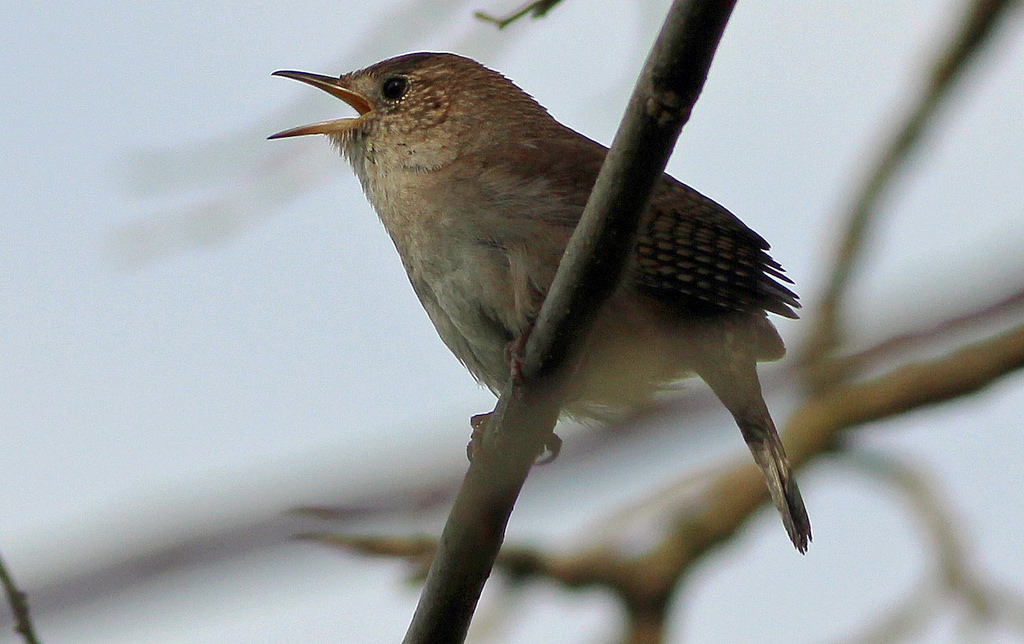

In [ ]:
img

We'll be working with images as arrays, so let's use `NumPy` to convert this image to an array. It's as easy as: 

In [ ]:
img_array = np.array(img)
img_array.shape

(644, 1024, 4)

We can go back to images with: 

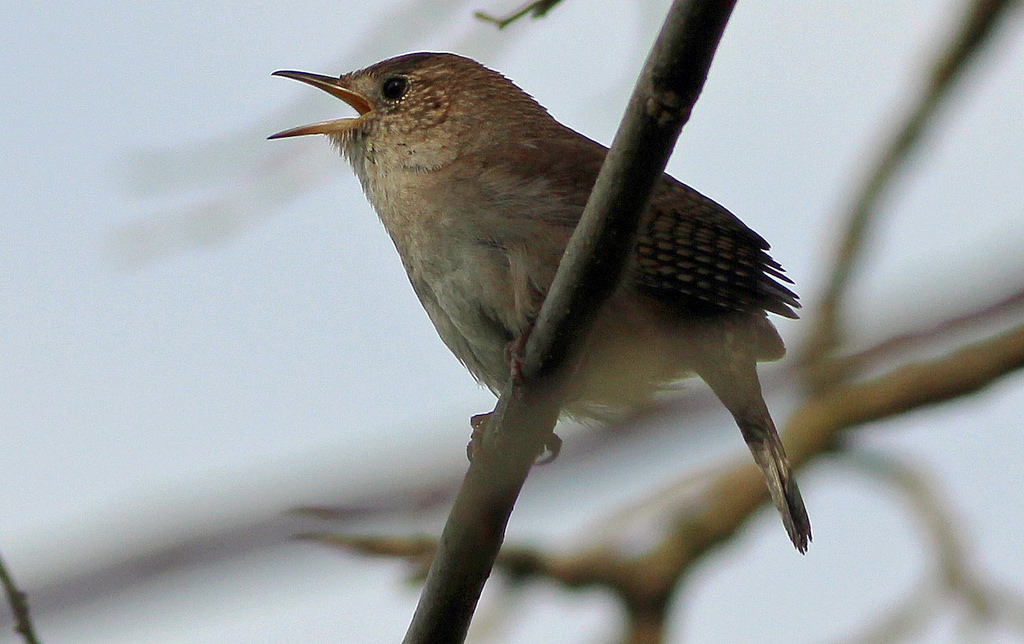

In [ ]:
Image.fromarray(img_array)

### The dimensions
The last dimension represents the colours and transparency


#### Colours

In [ ]:
# red
img_array[:10,:10,0]

array([[193, 196, 192, 192, 194, 193, 195, 194, 196, 198],
       [195, 196, 194, 194, 194, 192, 192, 191, 196, 196],
       [195, 193, 195, 195, 193, 193, 192, 191, 194, 193],
       [194, 191, 195, 195, 193, 194, 192, 193, 194, 192],
       [196, 193, 196, 196, 195, 196, 194, 195, 194, 192],
       [194, 193, 196, 197, 195, 195, 193, 193, 194, 192],
       [193, 194, 194, 195, 196, 192, 192, 193, 196, 193],
       [192, 194, 190, 194, 196, 192, 193, 195, 199, 195],
       [188, 191, 190, 192, 193, 190, 192, 189, 193, 191],
       [190, 192, 191, 191, 190, 188, 188, 187, 190, 190]], dtype=uint8)

In [ ]:
# green
img_array[:10,:10,1]

array([[205, 208, 204, 206, 208, 207, 209, 208, 208, 210],
       [207, 208, 208, 208, 211, 209, 209, 208, 210, 210],
       [207, 207, 209, 209, 210, 210, 209, 208, 210, 209],
       [206, 203, 207, 209, 207, 211, 209, 210, 210, 208],
       [205, 202, 208, 208, 207, 209, 207, 209, 207, 205],
       [206, 205, 208, 209, 207, 207, 205, 206, 206, 204],
       [207, 208, 208, 209, 208, 205, 205, 206, 208, 205],
       [209, 211, 207, 208, 210, 206, 209, 211, 211, 207],
       [205, 208, 206, 208, 209, 208, 210, 207, 213, 209],
       [207, 208, 207, 207, 206, 206, 206, 205, 208, 208]], dtype=uint8)

In [ ]:
# blue
img_array[:10,:10,2]

array([[221, 224, 220, 219, 219, 218, 220, 217, 222, 224],
       [223, 222, 221, 221, 221, 219, 217, 216, 223, 223],
       [221, 220, 222, 220, 220, 220, 217, 216, 223, 224],
       [222, 217, 221, 222, 220, 221, 219, 220, 225, 223],
       [222, 219, 224, 224, 223, 225, 223, 222, 223, 221],
       [222, 221, 224, 225, 223, 223, 221, 222, 222, 220],
       [220, 221, 221, 222, 224, 221, 221, 222, 224, 219],
       [219, 221, 217, 221, 223, 219, 222, 224, 225, 221],
       [215, 218, 219, 221, 222, 218, 220, 217, 222, 219],
       [217, 221, 220, 220, 219, 218, 218, 217, 220, 220]], dtype=uint8)

### Transparency

In [ ]:
# alpha
img_array[:10,:10,3]

array([[255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255]], dtype=uint8)

## Image manipulation
Let's do some (rather silly) manipulations of the image array. This is just to enforce the relationship between arrays and images. 


### 1. Change transparency
First, we'll make a copy of the array, change the transparancy values and then see what it looks like. 

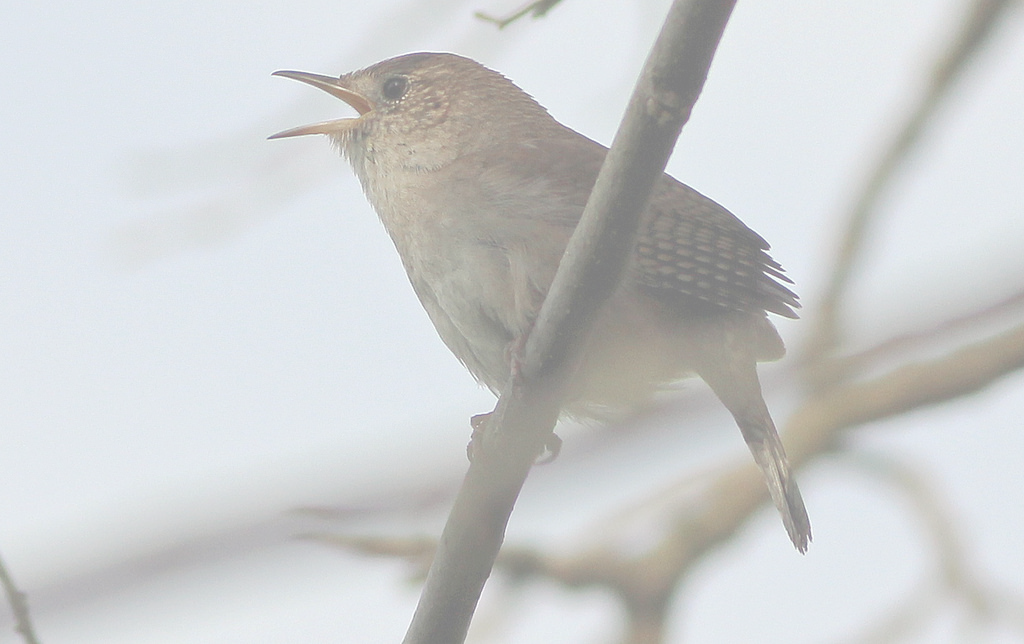

In [ ]:
tmp = np.copy(img_array)
tmp[:, :, 3] = 128
Image.fromarray(tmp)

### 2. Alter red values
Let's half all the red values and see what happens. 
The image arrays are of type `uint8` (unsigned 8-bit integers) and we must keep them that way. Multiplying by a float coerces them to `float64` so we have to cast them back to `uint8`: 



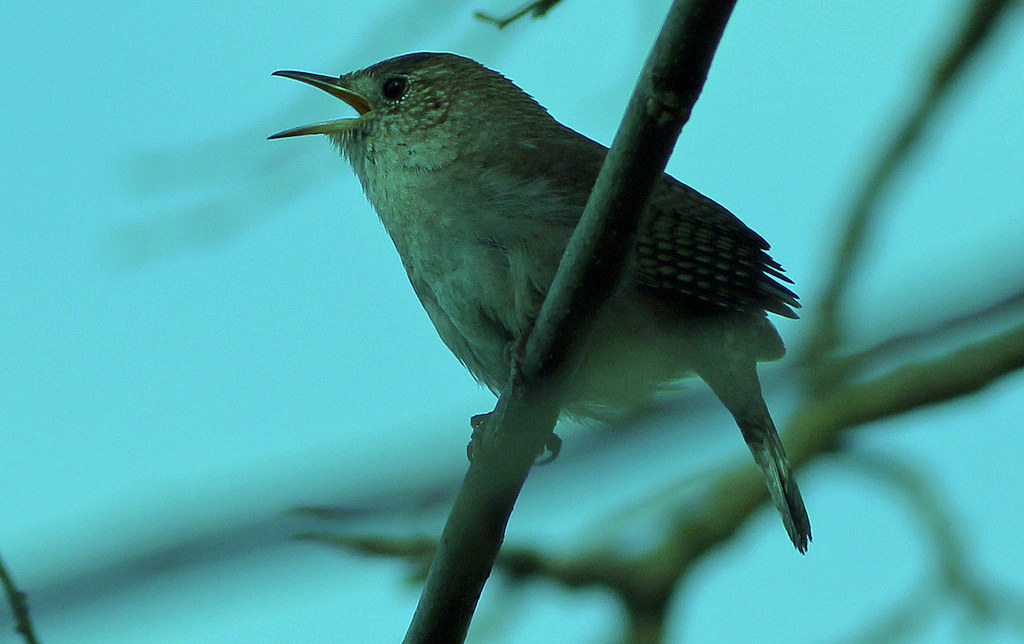

In [ ]:
tmp = np.copy(img_array)
tmp[:,:, 0] = (tmp[:, :, 0]*0.5).astype('uint8')
Image.fromarray(tmp)

### 3. Swap blue and green 



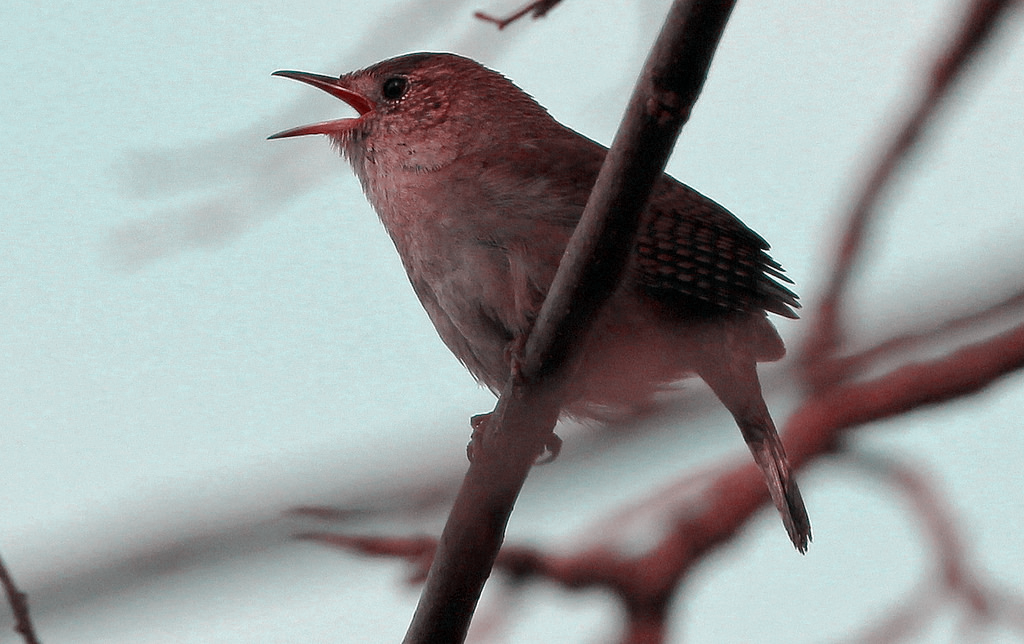

In [ ]:
tmp = np.copy(img_array)
green = tmp[:, :, 1]
blue = tmp[:, :, 2]
tmp[:, :, 1] = blue
tmp[:, :, 2] = green
Image.fromarray(tmp)

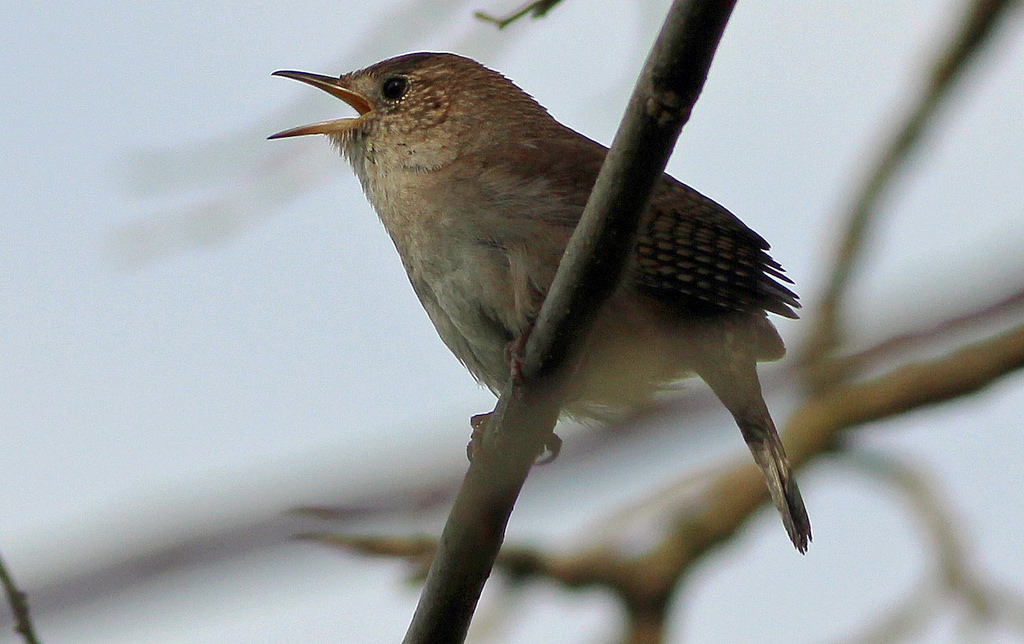

In [ ]:
# compare to original
Image.fromarray(img_array)


### 4. Invert image

We can use the Numpy/Python indexing rules to invert the image

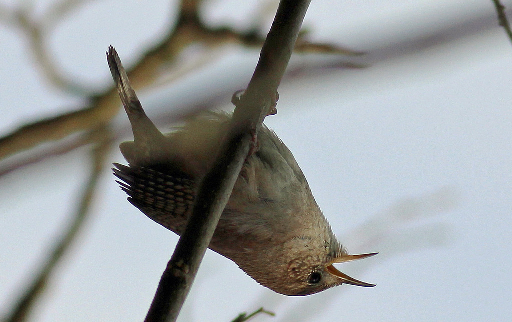

In [ ]:
tmp = np.copy(img_array)
Image.fromarray(tmp[::-2, ::-2, :])

## Exercises

Instructions: to complete the exercises you'll need to add a code cell below each exercise cell.  If you hover your mouse at the bottom of a cell you will see a button marked `code` pop up.  click on it to insert a new code cell 

#### Exercise 1

We'll continue to use the `img` variable which is a `PIL.Image` object. Here is a list of all the things that this type of object can do: https://pillow.readthedocs.io/en/stable/reference/Image.html

For instance, I can rotate an image.  The docuemntation has a function: 

> Image.rotate(angle, resample=0, expand=0, center=None,translate=None, fillcolor=None)

If I want to use this function to rotate an image, i just replace `Image` with my variable `img` and type this in a cell and specify and angle: 

```
rotated_image = img.rotate(90)

```

To view any image, just type it in a cell: 

```
rotated_image
```

Try this in cell below:

In [ ]:
# answer

#### Exercise 2

Now resize the image to size (600, 400).  You'll need to look at the documentation. 

In [ ]:
# answer

#### Exercise 3

You can convert the image to a numpy array by: 

```
import numpy as np

image_array = np.array(img)
```
Do this in the cell below:

In [ ]:
# answer

#### Exercise 4
Use array indexing to select the top left 400 x 400 pixels.  call this `image_array_subset`.  Remember the array is 3D and you'll need all three colours for each of the 400 x 400 pixels. 

In [ ]:
# answer

#### Exercise 5

Most image CNNs don't deal with the transparency layer. Create a new image object **without** the transparency layer, and save as a JPG. 



In [ ]:
# answer

## Matplotlib (Optional)

Matplotlib is a plotting library. In this section give a brief introduction to the `matplotlib.pyplot` module, which provides a plotting system similar to that of MATLAB.

In [ ]:
import matplotlib.pyplot as plt

By running this special iPython command, we will be displaying plots inline:

In [ ]:
%matplotlib inline

### Plotting

The most important function in `matplotlib` is plot, which allows you to plot 2D data. Here is a simple example:

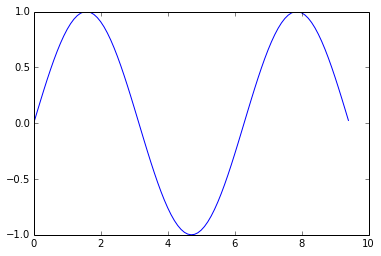

In [ ]:
# Compute the x and y coordinates for points on a sine curve
x = np.arange(0, 3 * np.pi, 0.1)
y = np.sin(x)

# Plot the points using matplotlib
plt.plot(x, y)

With just a little bit of extra work we can easily plot multiple lines at once, and add a title, legend, and axis labels:

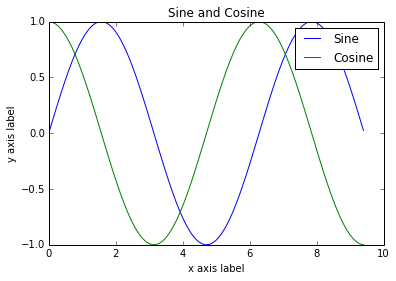

In [ ]:
y_sin = np.sin(x)
y_cos = np.cos(x)

# Plot the points using matplotlib
plt.plot(x, y_sin)
plt.plot(x, y_cos)
plt.xlabel('x axis label')
plt.ylabel('y axis label')
plt.title('Sine and Cosine')
plt.legend(['Sine', 'Cosine'])

### Subplots 

You can plot different things in the same figure using the subplot function. Here is an example:

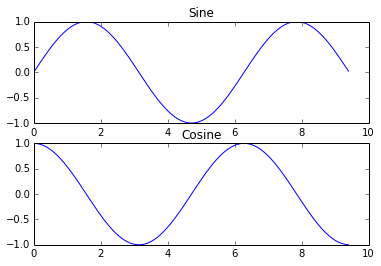

In [ ]:
# Compute the x and y coordinates for points on sine and cosine curves
x = np.arange(0, 3 * np.pi, 0.1)
y_sin = np.sin(x)
y_cos = np.cos(x)

# Set up a subplot grid that has height 2 and width 1,
# and set the first such subplot as active.
plt.subplot(2, 1, 1)

# Make the first plot
plt.plot(x, y_sin)
plt.title('Sine')

# Set the second subplot as active, and make the second plot.
plt.subplot(2, 1, 2)
plt.plot(x, y_cos)
plt.title('Cosine')

# Show the figure.
plt.show()

You can read much more about the `subplot` function in the [documentation](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.subplot).